# Shock Tube Machine Learning Example
Compare numerical & ML-enhanced numercial shock Mach number and velocity predictions to the analytical result.

The Mach number that travels through the driven section of a shock tube travels at the Mach number given by the expression below.

$$M_{s}^2 = \frac{\gamma_{n} + 1}{2\gamma_{n}}\left( \frac{P_{r}}{P_{n}} + \frac{\gamma_{n} - 1}{\gamma_{n} + 1} \right) $$

The subscript $n$ indicates driven system quantities, and the subscript $r$ indicates driver system quantities.

The velocity of the shock wave as it travels through the driven section is then given by

$$U_{s} = M_{s}\sqrt{\gamma_{n}R_{n}T_{n}}$$

In [1]:
"""Import modules used for calculation and plotting"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.constants import convert_temperature

In [10]:
"""Input parameters: 
    1. driven ratio of specific heats (γ_n), 
    2. driven gas specific gas constant (R),
    3. the initial driver to driven pressure ratio (Pr_Pn), and
    4. the initial driven section temperature in degrees K"""
γn = 1.4 # Diatomic gas (e.g. air)
Rn_J_kg = 287.5 # air 
Pr_Pn = np.linspace(1,10,100)
Tn_K = convert_temperature(25,'C','K')

# Lambda function definitions: shock Mach number & shock velocity (m/s)
Mshock = lambda γ, π: np.sqrt((γ + 1) / 2 / γ * (π + (γ - 1) / (γ + 1)))
Ushock_m_s = lambda M, γ, R, T_K: M * np.sqrt( γ * R * T_K)

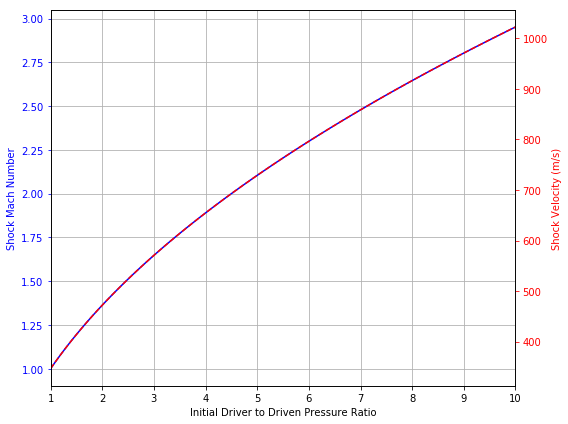

In [13]:
 """Shock Mach number & Velocity Double-Y plot"""
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(Pr_Pn,Mshock(γn,Pr_Pn),'b-',label='Shock Mach Number')
ax1.set_xlim(left=np.min(Pr_Pn),right=np.max(Pr_Pn))
ax1.set_xlabel('Initial Driver to Driven Pressure Ratio')
ax1.set_ylabel('Shock Mach Number',color='b')
ax1.tick_params('y', colors='b')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(Pr_Pn,Ushock_m_s(Mshock(γn, Pr_Pn), γn, Rn_J_kg, Tn_K),'r--')
ax2.set_ylabel('Shock Velocity (m/s)',color='r')
ax2.tick_params('y',colors='r')

fig.tight_layout()
plt.show()